In [1]:
import graphstats

import numpy as np
import networkx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import _pickle as pickle
dir(graphstats)

['Dict',
 'GaussianMixture',
 'Graph',
 'MVN',
 'NonParametricClustering',
 'OutOfCoreAdjacencySpectralEmbedding',
 'Sequence',
 'SpectralGraphClustering',
 'TruncatedSVD',
 'TypeVar',
 'Union',
 'VertexNominationSeededGraphMatching',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'absolute_import',
 'adj_spectral_embedding',
 'ase',
 'dimselect',
 'gaussian_classification',
 'gaussian_clustering',
 'gclass',
 'gclust',
 'lap_spectral_embedding',
 'largest_connected_component',
 'lcc',
 'lse',
 'networkx',
 'nonpar',
 'norm',
 'np',
 'num_clust',
 'numclust',
 'omni',
 'oocase',
 'os',
 'pass_to_ranks',
 'profile_likelihood',
 'ptr',
 'rankdata',
 'robjects',
 'rpy2',
 'sgc',
 'vnsgm']

In [2]:
DS = pickle.load(open('datasets/DS01876.pkl', 'rb')) 
G_DS = DS['0']
G_DS = graphstats.largest_connected_component(G_DS)

G1_DS = G_DS.subgraph(np.arange(50))

print("All nodes: " + str(len(G1_DS)))

G1_DS = graphstats.largest_connected_component(G1_DS)
print("Connected nodes: " + str(len(G1_DS)))

All nodes: 50
Connected nodes: 48


In [3]:
ptrDS = graphstats.pass_to_ranks(G_DS)
ptrDS

array([[0.        , 0.37103916, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.37103916, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.0584565 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.0584565 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [4]:
A2 = graphstats.adj_spectral_embedding(ptrDS)
A2

(array([[ 2.23777356e-06,  2.46852620e-07],
        [ 8.64081171e-04,  6.27288087e-05],
        [ 1.35011143e-04, -4.75426731e-05],
        ...,
        [ 1.90733504e-12, -1.60477042e-11],
        [ 7.78150008e-16, -9.97028107e-15],
        [ 3.95733265e-07, -3.19739011e-06]]),
 array([143.27078591,  94.08433421]))

In [5]:
A10 = graphstats.adj_spectral_embedding(ptrDS, max_dim = 10, eig_scale = 0.5)
A10

(array([[ 2.23777502e-06,  2.47512816e-07, -5.12320249e-06, ...,
         -7.97445115e-05, -1.24621385e-05,  3.60085178e-05],
        [ 8.64081282e-04,  6.27799437e-05, -1.09178534e-03, ...,
         -8.85447133e-03, -1.32496305e-03,  3.08768422e-03],
        [ 1.35011481e-04, -4.74884406e-05, -1.17824948e-04, ...,
         -1.11290740e-03,  2.66449530e-03,  1.35412573e-02],
        ...,
        [ 1.90737437e-12, -1.60471257e-11, -3.43077434e-11, ...,
          2.57183682e-10,  1.33985782e-10,  2.91185793e-10],
        [ 7.78225478e-16, -9.96973944e-15, -2.53714195e-14, ...,
          3.69951577e-13,  2.16330026e-13,  4.58341446e-13],
        [ 3.95739832e-07, -3.19702530e-06, -5.00653364e-06, ...,
          1.66556320e-05,  2.31608580e-05,  2.45184921e-05]]),
 array([143.27078591,  94.08433421,  79.07211094,  76.36829945,
         54.3047676 ,  52.52949605,  48.86104599,  41.64536504,
         37.50702579,  35.2721677 ]))

In [6]:
A10_scale0 = graphstats.adj_spectral_embedding(ptrDS, max_dim = 10, eig_scale = 0)
A10_scale0

(array([[ 1.86955222e-07,  2.55175534e-08, -5.76142424e-07, ...,
         -1.23571257e-05, -2.03486808e-06,  6.06302236e-06],
        [ 7.21897895e-05,  6.47235402e-06, -1.22779424e-04, ...,
         -1.37207958e-03, -2.16345295e-04,  5.19896391e-04],
        [ 1.12795528e-05, -4.89586294e-06, -1.32502963e-05, ...,
         -1.72454962e-04,  4.35069507e-04,  2.28004236e-03],
        ...,
        [ 1.59351854e-13, -1.65439266e-12, -3.85816225e-12, ...,
          3.98529131e-11,  2.18777373e-11,  4.90291209e-11],
        [ 6.50169546e-17, -1.02783914e-15, -2.85320581e-15, ...,
          5.73273078e-14,  3.53232365e-14,  7.71743632e-14],
        [ 3.30621387e-08, -3.29600160e-07, -5.63022139e-07, ...,
          2.58093924e-06,  3.78179803e-06,  4.12836115e-06]]),
 array([143.27078591,  94.08433421,  79.07211094,  76.36829945,
         54.3047676 ,  52.52949605,  48.86104599,  41.64536504,
         37.50702579,  35.2721677 ]))

In [7]:
elbows = graphstats.profile_likelihood(A10[1], n_elbows = 2, threshold = 0)
A10_elb2 = A10[0][:, :elbows[1]].copy()
elbows, A10_elb2.shape

(array([4, 7]), (1759, 7))

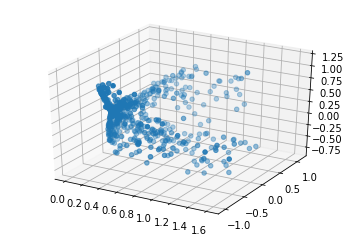

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(A10_elb2[:,0], A10_elb2[:,1], A10_elb2[:,2])

In [9]:
BICs = graphstats.num_clust(A10_elb2, max_clusters = 10, min_clusters = 5, acorn = 1)
BICs

C:\Anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


[['Ranked number of clusters (BIC)', 9, 10, 8, 7, 6, 5, 4, 3, 2, 1],
 ['Ranked number of clusters (AIC)', 10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
 [('number of clusters', 'BIC', 'AIC'),
  (1, 4573.8097291112435, 'diag', 4650.42473953757, 'diag'),
  (2, 47917.5723189287, 'full', 48306.119871805065, 'full'),
  (3, 57081.51100115438, 'diag', 57473.14163663396, 'full'),
  (4, 63136.10748903532, 'full', 63918.67509553279, 'full'),
  (5, 65523.63764745996, 'full', 66503.21528076798, 'full'),
  (6, 66292.69282503749, 'full', 67469.28048515606, 'full'),
  (7, 69588.5925181758, 'full', 70962.19020510494, 'full'),
  (8, 69621.41299670018, 'full', 71192.02071043986, 'full'),
  (9, 70205.14410411075, 'full', 71972.76184466097, 'full'),
  (10, 70134.6340636658, 'full', 72099.26183102658, 'full')]]

C:\Anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


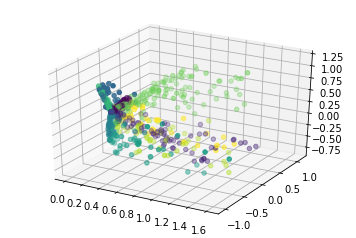

In [10]:
Yhat = graphstats.gaussian_clustering(A10_elb2, max_clusters = 10, min_clusters = 5, acorn = 4)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(A10_elb2[:,0], A10_elb2[:,1], A10_elb2[:,2], c = Yhat)